In [1]:
import time
import os
import re
import datetime
import glob
import sys

sys.path.append('..')

import numpy as np
import pandas as pd

In [5]:
path = '../database/v1_m/playerdb_2021-22_regular.csv'
df= pd.read_csv(path)
df

,No.,L,Player,Set,1,2,3,4,5,AA,...,Lose_Point,Game_Time,Start_Time,End_Time,Spectators,Jury,Chief_Umpire,Sub_Umpire,Judgeman,Home_Away
0,1,NaN,藤中優斗,4,■,■,■,■,NaN,16,...,95,104,19:00,21:00,960,小柴滋,原啓之,戸川太輔,田中栄二,Home
1,2,NaN,金丸晃大,2,NaN,NaN,□,□,NaN,0,...,95,104,19:00,21:00,960,小柴滋,原啓之,戸川太輔,田中栄二,Home
2,4,NaN,福山汰一,4,■,■,■,■,NaN,14,...,95,104,19:00,21:00,960,小柴滋,原啓之,戸川太輔,田中栄二,Home
3,6,NaN,フォンテレスフェリペ,4,■,■,□,□,NaN,22,...,95,104,19:00,21:00,960,小柴滋,原啓之,戸川太輔,田中栄二,Home
4,8,NaN,郡浩也,0,NaN,NaN,NaN,NaN,NaN,0,...,95,104,19:00,21:00,960,小柴滋,原啓之,戸川太輔,田中栄二,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4721,16,L,伊賀亮平,4,〇,〇,〇,〇,NaN,0,...,92,116,16:30,18:42,1580,酒出修,山本晋五,原啓之,田中栄二,Away
4722,17,L,永野健,4,●,●,●,●,NaN,0,...,92,116,16:30,18:42,1580,酒出修,山本晋五,原啓之,田中栄二,Away
4723,20,NaN,新貴裕,0,NaN,NaN,NaN,NaN,NaN,0,...,92,116,16:30,18:42,1580,酒出修,山本晋五,原啓之,田中栄二,Away
4724,22,NaN,小宮雄一郎,0,NaN,NaN,NaN,NaN,NaN,0,...,92,116,16:30,18:42,1580,酒出修,山本晋五,原啓之,田中栄二,Away


In [6]:
player_df = df.groupby('Player').sum().reset_index()
player_df

,Player,No.,Set,AA,AP,AE,BAA,BAP,BAE,BP,...,Year,Month,Day,Win_Set,Lose_Set,Total_Set,Get_Point,Lose_Point,Game_Time,Spectators
0,エスペホマーク,435,81,506,188,42,71,35,9,25,...,58624,183,495,37,69,106,2286,2488,2865,24365
1,エドガートーマス,204,132,1509,750,111,629,349,51,40,...,68734,192,565,65,67,132,2934,2927,3450,31446
2,エバデダンラリー,345,28,48,31,2,0,0,0,10,...,30330,33,190,40,17,57,1390,1216,1530,15570
3,エメルソンロドリゲス,64,96,793,356,84,343,160,37,9,...,64690,183,582,29,89,118,2455,2838,3110,24915
4,クビアクミハウ,442,127,940,432,76,153,73,19,40,...,68734,198,557,84,43,127,3021,2713,3391,38560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,高橋良,456,6,29,15,1,2,1,0,0,...,48516,160,449,59,31,90,2103,1957,2502,21742
184,高野直哉,128,86,433,205,32,33,13,5,32,...,64690,182,586,79,38,117,2750,2523,3088,18885
185,鵜野幸也,713,25,104,46,5,16,10,0,2,...,62668,179,540,73,41,114,2650,2470,3013,20184
186,鶴田大樹,30,113,0,0,0,0,0,0,0,...,60650,148,525,71,43,114,2600,2450,3027,34195


In [7]:
player_df.columns

Index(['Player', 'No.', 'Set', 'AA', 'AP', 'AE', 'BAA', 'BAP', 'BAE', 'BP',
       'SVA', 'SVP', 'SVE', 'SVx', 'RA', 'Rx', 'Rg', 'MatchNo.', 'Year',
       'Month', 'Day', 'Win_Set', 'Lose_Set', 'Total_Set', 'Get_Point',
       'Lose_Point', 'Game_Time', 'Spectators'],
      dtype='object')

In [8]:
def stats_calc(df):
    df['ASucc%'] = ((df['AP'] / df['AA']) * 100).round(1)
    df['AEff%'] = (((df['AP']-df['AE']) /
                     df['AA']) * 100).round(1)
    df['BASucc%'] = ((df['BAP'] / df['BAA']) * 100).round(1)
    df['AP/S'] = (df['AP'] / df['Set']).round(2)
    df['BP/S'] = (df['BP'] / df['Set']).round(2)
    df['SVEff%'] = ((df['SVP'] * 100 + df['SVx'] * 25 -
                    df['SVE'] * 25) / df['SVA']).round(1)
    df['RSucc%'] = (
        (df['Rx'] * 100 + df['Rg'] * 50) / df['RA']).round(1)
    return df

In [9]:
player_df = stats_calc(player_df)
player_df

,Player,No.,Set,AA,AP,AE,BAA,BAP,BAE,BP,...,Lose_Point,Game_Time,Spectators,ASucc%,AEff%,BASucc%,AP/S,BP/S,SVEff%,RSucc%
0,エスペホマーク,435,81,506,188,42,71,35,9,25,...,2488,2865,24365,37.2,28.9,49.3,2.32,0.31,3.6,52.4
1,エドガートーマス,204,132,1509,750,111,629,349,51,40,...,2927,3450,31446,49.7,42.3,55.5,5.68,0.30,9.2,0.0
2,エバデダンラリー,345,28,48,31,2,0,0,0,10,...,1216,1530,15570,64.6,60.4,NaN,1.11,0.36,2.3,59.1
3,エメルソンロドリゲス,64,96,793,356,84,343,160,37,9,...,2838,3110,24915,44.9,34.3,46.6,3.71,0.09,9.2,0.0
4,クビアクミハウ,442,127,940,432,76,153,73,19,40,...,2713,3391,38560,46.0,37.9,47.7,3.40,0.31,8.6,56.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,高橋良,456,6,29,15,1,2,1,0,0,...,1957,2502,21742,51.7,48.3,50.0,2.50,0.00,0.0,54.2
184,高野直哉,128,86,433,205,32,33,13,5,32,...,2523,3088,18885,47.3,40.0,39.4,2.38,0.37,3.8,52.4
185,鵜野幸也,713,25,104,46,5,16,10,0,2,...,2470,3013,20184,44.2,39.4,62.5,1.84,0.08,0.8,48.6
186,鶴田大樹,30,113,0,0,0,0,0,0,0,...,2450,3027,34195,NaN,NaN,NaN,0.00,0.00,NaN,58.0


In [10]:
player_df2 = player_df[['AA','ASucc%','AEff%','BASucc%','BP/S','SVEff%','RSucc%']]
player_df2

,AA,ASucc%,AEff%,BASucc%,BP/S,SVEff%,RSucc%
0,506,37.2,28.9,49.3,0.31,3.6,52.4
1,1509,49.7,42.3,55.5,0.30,9.2,0.0
2,48,64.6,60.4,NaN,0.36,2.3,59.1
3,793,44.9,34.3,46.6,0.09,9.2,0.0
4,940,46.0,37.9,47.7,0.31,8.6,56.3
...,...,...,...,...,...,...,...
183,29,51.7,48.3,50.0,0.00,0.0,54.2
184,433,47.3,40.0,39.4,0.37,3.8,52.4
185,104,44.2,39.4,62.5,0.08,0.8,48.6
186,0,NaN,NaN,NaN,0.00,NaN,58.0


In [11]:
player_std = player_df2.apply(lambda x: ((x-x.mean())/x.std()*10+50).round(1), axis=0)
player_std

,AA,ASucc%,AEff%,BASucc%,BP/S,SVEff%,RSucc%
0,61.0,44.4,45.5,54.6,57.0,48.3,52.5
1,94.9,51.2,50.7,57.3,56.4,57.3,29.9
2,45.5,59.3,57.9,NaN,59.6,46.2,55.3
3,70.7,48.6,47.6,53.4,45.3,57.3,29.9
4,75.7,49.2,49.0,53.9,57.0,56.3,54.1
...,...,...,...,...,...,...,...
183,44.9,52.3,53.1,54.9,40.5,42.5,53.2
184,58.5,49.9,49.8,50.2,60.1,48.6,52.5
185,47.4,48.2,49.6,60.4,44.7,43.8,50.8
186,43.9,NaN,NaN,NaN,40.5,NaN,54.9


In [19]:
player_std2 = pd.concat([player_df[['Player']],player_std], axis=1)
player_std2

,Player,AA,ASucc%,AEff%,BASucc%,BP/S,SVEff%,RSucc%
0,エスペホマーク,61.0,44.4,45.5,54.6,57.0,48.3,52.5
1,エドガートーマス,94.9,51.2,50.7,57.3,56.4,57.3,29.9
2,エバデダンラリー,45.5,59.3,57.9,NaN,59.6,46.2,55.3
3,エメルソンロドリゲス,70.7,48.6,47.6,53.4,45.3,57.3,29.9
4,クビアクミハウ,75.7,49.2,49.0,53.9,57.0,56.3,54.1
...,...,...,...,...,...,...,...,...
183,高橋良,44.9,52.3,53.1,54.9,40.5,42.5,53.2
184,高野直哉,58.5,49.9,49.8,50.2,60.1,48.6,52.5
185,鵜野幸也,47.4,48.2,49.6,60.4,44.7,43.8,50.8
186,鶴田大樹,43.9,NaN,NaN,NaN,40.5,NaN,54.9


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# import plotly.offline
# import plotly.express as px
# import plotly.graph_objects as go
# import plotly.subplots
# import squarify

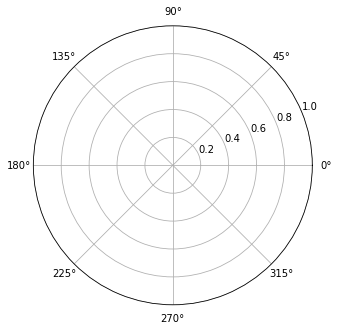

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(5, 6), subplot_kw={'projection': 'polar'})
# fig = plt.figure()

In [34]:
sample = player_std2.iloc[0, 1:]
print(len(sample))
angles_A = np.linspace(start=0, stop=2*np.pi, num=len(sample), endpoint=True)
values_A = np.concatenate((sample, [sample[0]]))
sample

7


AA         61.0
ASucc%     44.4
AEff%      45.5
BASucc%    54.6
BP/S       57.0
SVEff%     48.3
RSucc%     52.5
Name: 0, dtype: object

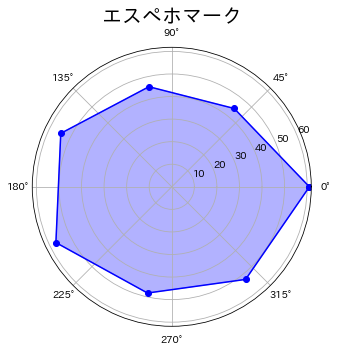

In [37]:
# fig, ax = plt.subplots(1, 1, figsize=(5, 6), subplot_kw={'projection': 'polar'})
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, polar=True)

#
i = 0
player = player_std2.iloc[i,0]
sample = player_std2.iloc[i, 1:]
# print(len(sample))
ax.set_title(player, fontsize=20)
angles_A = np.linspace(start=0, stop=2*np.pi, num=len(sample)+1, endpoint=True)
values_A = np.concatenate((sample, [sample[0]]))

ax.plot(angles_A, values_A, 'o-', color="blue", label='A')
# ax[1].plot(angles_A, values_A, 'o-', color="blue", label='B')
ax.fill(angles_A, values_A, alpha=0.3, color="blue")
# ax[1].fill(angles_A, values_A, alpha=0.3, color="blue")
plt.show()

In [25]:
player_std2.iloc[0,0]

'エスペホマーク'

In [65]:
values_A

array([61. , 44.4, 45.5, 54.6, 57. , 48.3, 52.5, 61. ])

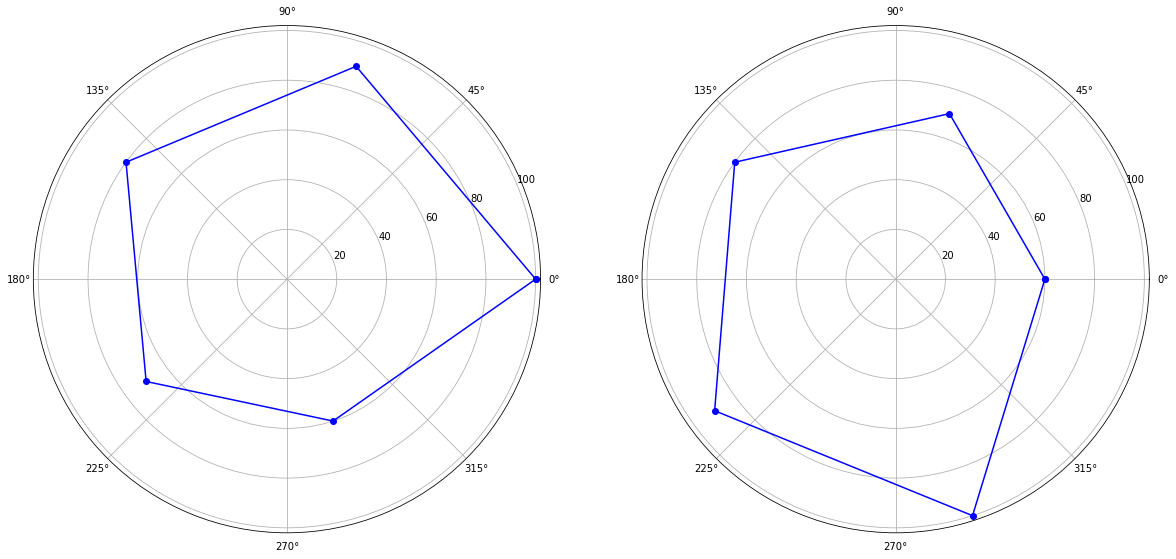

In [70]:
data = {'A': [100, 90, 80, 70, 60],
        'B': [60, 70, 80, 90, 100]
       }
df = pd.DataFrame(data, index=['Math', 'Science', 'Japanese', 'English', 'PE'])

# fig, ax = plt.subplots(1, 2, figsize=(20, 24), subplot_kw={'projection': 'polar'})

angles_A = np.linspace(start=0, stop=2*np.pi, num=len(df["A"])+1, endpoint=True)
values_A = np.concatenate((df["A"], [df["A"][0]]))
angles_B = np.linspace(start=0, stop=2*np.pi, num=len(df["B"])+1, endpoint=True)
values_B = np.concatenate((df["B"], [df["B"][0]]))

fig, ax = plt.subplots(1, 2, figsize=(20, 24), subplot_kw={'projection': 'polar'})
ax[0].plot(angles_A, values_A, 'o-', color="blue", label="A")
ax[1].plot(angles_B, values_B, 'o-', color="blue", label="B")

In [ ]:
plt.savefig('test.png', facecolor='white',bbox_inches="tight")
plt.show()